# Student Loan Risk with Deep Learning

In [132]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [133]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [134]:
# Review the data types associated with the columns
display(loans_df.dtypes)

,0
payment_history,float64
location_parameter,float64
stem_degree_score,float64
gpa_ranking,float64
alumni_success,float64
study_major_code,float64
time_to_completion,float64
finance_workshop_score,float64
cohort_ranking,float64
total_loan_score,float64


In [135]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

,count
credit_ranking,
1,855
0,744


### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [136]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
display(y[:5])
display(y.value_counts())

,credit_ranking
0,0
1,0
2,0
3,1
4,0


,count
credit_ranking,
1,855
0,744


In [137]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
display(X.head())

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [138]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [140]:
# Create a StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit/train the scaler to the features training dataset
scaler.fit(X_train)

# Scale the X train and X test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_scaled = pd.DataFrame(X_train_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.361405,-0.772245,-0.779287,-0.606333,0.203950,0.312585,-0.576045,-0.414527,-0.965277,-0.972444,-0.961217
1,-0.246754,0.637692,-1.342466,-0.038092,-0.197900,0.121073,-0.248851,-0.232759,0.194216,0.496316,1.172582
2,-0.820010,1.125747,-1.240070,-0.180152,-0.705499,-0.836489,-0.903240,-0.884984,0.902795,-0.149938,0.987034
3,-1.794546,-0.229962,-0.062514,-0.180152,0.055900,0.695610,0.821969,-0.767370,2.577617,-0.208689,1.636451
4,-0.017451,0.691921,-0.625693,-0.464273,-0.176750,0.121073,-0.129871,0.248391,0.000967,-0.678692,-0.775669


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [129]:
# Define the the number of inputs (features) to the model
display(X.columns)
feature_count = len(X.columns)
print(feature_count)

Index(['payment_history', 'location_parameter', 'stem_degree_score',
       'gpa_ranking', 'alumni_success', 'study_major_code',
       'time_to_completion', 'finance_workshop_score', 'cohort_ranking',
       'total_loan_score', 'financial_aid_score'],
      dtype='object')

11


,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [106]:
# Define the model

# Define the number of neurons/hidden nodes for the first hidden layer
hidden_nodes_layer_1 = 10

# Define the number of neurons/hidden nodes for the second hidden layer
hidden_nodes_layer_2 = 5

# Define the number of neurons in the output layer
neurons_output_layer = 1

In [141]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Create the Keras Sequential model instance
nn_model = Sequential()

# Add the first Dense, including the input layer
nn_model.add(Dense(units=hidden_nodes_layer_1, activation="relu", input_dim = feature_count))
# Warning? When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead??

# Add the second Dense/hidden layer
nn_model.add(Dense(units=hidden_nodes_layer_2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_model.add(Dense(units=1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [142]:
# Display the Sequential model summary/Check the structure of the model
nn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [143]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Fit/Train the model using 50 epochs and the training data
# The epoch runs are all Training...see these accuracy values for overfit tendencies
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5163 - loss: 0.7687
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5288 - loss: 0.7063
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5975 - loss: 0.6487
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6295 - loss: 0.6261
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.6082
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6760 - loss: 0.5996
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6840 - loss: 0.5837
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7150 - loss: 0.5749
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7349 - loss: 0.5645
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.5725
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7149 - loss: 0.5634
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - lo

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [44]:
# Evaluate the model using the test data:
# Determine model loss and accuracy metrics using the evaluate method on the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled , y_test, verbose=2)

# Display evaluation results (model loss and accuracy):
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 15ms/step - accuracy: 0.7625 - loss: 0.5198
Loss: 0.519763708114624, Accuracy: 0.762499988079071


In [57]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)
# Increase the index by 1 to match the number of epochs
history_df.index += 1
# Inspect history df
display(history_df.head())

,accuracy,loss
1,0.536280,0.739782
2,0.560467,0.682829
3,0.589658,0.647790
4,0.638032,0.624586
5,0.665555,0.607963


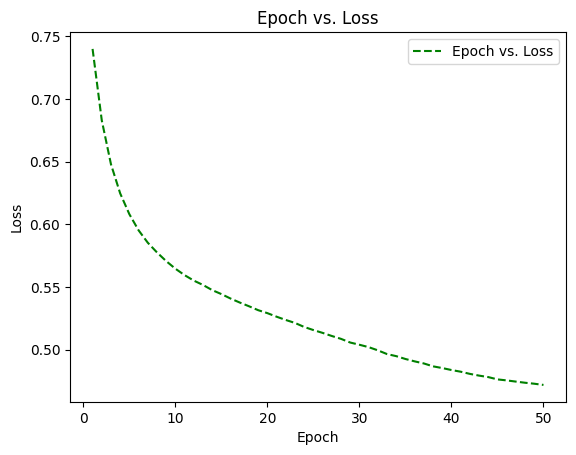

In [65]:
import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_df.index, history_df['loss'], label='Epoch vs. Loss', color='g', linestyle='--')
plt.title('Epoch vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# simple dataframe plot:
# history_df.plot(y="loss")

Text(0.5, 0, 'Epoch')

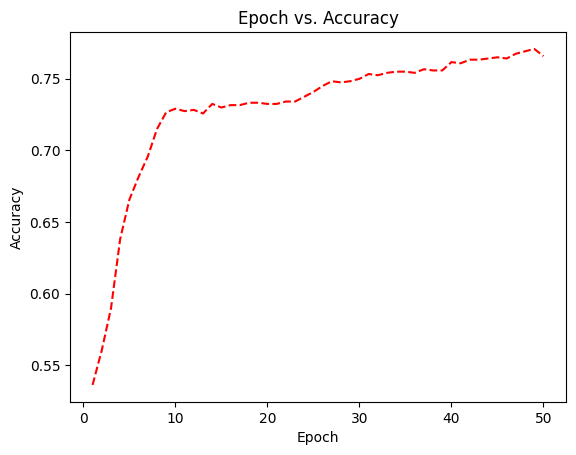

In [66]:
# Plot the accuracy
plt.plot(history_df.index, history_df['accuracy'], label='Epoch vs. Accuracy', color='r', linestyle='--')
plt.title('Epoch vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# simple dataframe plot:
# history_df.plot(y="accuracy")

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [109]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')#  , force_remount=True

# List the contents of My Drive
print(os.listdir('/content/drive/My Drive/saved_models'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['student_loans_perf.keras']


In [110]:
from pathlib import Path
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans.keras')

# Export your model to a keras file
nn_model.save(file_path)
print(os.listdir('/content/drive/My Drive/saved_models'))

['student_loans_perf.keras', 'student_loans.keras']


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [112]:
# Import the required libraries
import tensorflow as tf

print(os.listdir('/content/drive/My Drive/saved_models'))
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans.keras')

# Load the model to a new object
nn_imported = tf.keras.models.load_model(file_path)

['student_loans_perf.keras', 'student_loans.keras']


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [113]:
# Make predictions with the test data
# predictions = nn_model.predict(X_test,verbose=2)
predictions = nn_imported.predict(X_test, verbose=2)

# Display a sample of the predictions
predictions[:10]

13/13 - 0s - 8ms/step


array([[3.4568193e-06],
       [6.1006347e-09],
       [9.5069461e-04],
       [2.5783172e-07],
       [4.8821894e-04],
       [9.1722258e-04],
       [6.2075887e-05],
       [4.0362589e-13],
       [2.6926906e-03],
       [3.9394619e-03]], dtype=float32)

In [117]:
# Save the predictions to a DataFrame and round the predictions to binary results
df_predictions = pd.DataFrame(predictions)

df_binary = df_predictions.applymap(lambda x: 1 if x > 0.5 else 0)
display(df_binary.value_counts())
display(df_binary.head())
display(df_binary.tail())

<ipython-input-117-13887e202037>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_predictions.applymap(lambda x: 1 if x > 0.5 else 0)


,count
0,
0,400


,0
0,0
1,0
2,0
3,0
4,0


,0
395,0
396,0
397,0
398,0
399,0


### Step 4: Display a classification report with the y test data and predictions

In [115]:
# Print the classification report with the y test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, df_binary))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       188
           1       0.00      0.00      0.00       212

    accuracy                           0.47       400
   macro avg       0.23      0.50      0.32       400
weighted avg       0.22      0.47      0.30       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class 0
Precision (0.48): Out of all the instances predicted as class 0, 48% were actually class 0.
Recall (0.84): Out of all the actual instances of class 0, 84% were correctly predicted.
F1-Score (0.61): The harmonic mean of precision and recall, balancing the two metrics.
Support (188): The number of actual instances of class 0 in the dataset.
Class 1
Precision (0.59): Out of all the instances predicted as class 1, 59% were actually class 1.
Recall (0.21): Out of all the actual instances of class 1, 21% were correctly predicted.
F1-Score (0.31): The harmonic mean of precision and recall for class 1.
Support (212): The number of actual instances of class 1 in the dataset.
Overall Metrics
Accuracy (0.51): The overall accuracy of the model, indicating that 51% of the total predictions were correct.
Macro Avg: The unweighted average of precision, recall, and F1-score across both classes. This treats all classes equally.
Precision (0.54)
Recall (0.52)
F1-Score (0.46)
Weighted Avg: The average of precision, recall, and F1-score, weighted by the number of instances in each class. This accounts for class imbalance.
Precision (0.54)
Recall (0.51)
F1-Score (0.45)
Interpretation
Class 0: The model is better at identifying class 0 instances, with high recall but lower precision.
Class 1: The model struggles more with class 1, having higher precision but very low recall.
Overall Performance: The accuracy is slightly above random guessing (50%), indicating room for improvement. The macro and weighted averages suggest that the model’s performance is not balanced across classes.

In [ ]:
# Evalute the model using test data: nn_model.evaluate(X_test_scaled , y_test, verbose=2)

#    13/13 - 0s - 15ms/step - accuracy: 0.7625 - loss: 0.5198
#    Loss: 0.519763708114624, Accuracy: 0.762499988079071


# Make predictions with the test data
# Save the predictions to a DataFrame and round the predictions to binary results
# Print the classification report with the y test data and predictions

#               precision    recall  f1-score   support

#            0       0.48      0.84      0.61       188
#            1       0.59      0.21      0.31       212

#     accuracy                           0.51       400
#    macro avg       0.54      0.52      0.46       400
# weighted avg       0.54      0.51      0.45       400


# how to improve the model?
# re-run with alternate values, tagging new run with #perform.

---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**



In [ ]:
# NOTES for README:

# Create a deep neural network using Tensorflow's Keras model to predict student loan repayment
# CSV file contains information about previous student loan recipients

#   * Prepare the data for use on a neural network model.
#   * Compile and evaluate a model using a neural network.
#   * Predict loan repayment success with the neural network model
#   * Discuss recommendation system for student loans

# Prepare the data, including splitting and scaling.  The target dataset: “credit_ranking” column

    #   Define, create and compile the Neural Network model.
    #   Define the the number of inputs (features) to the model
    #   Define the number of neurons/hidden nodes
    #   Create the Keras Sequential model instance
    #   Add input layers and output layer
    #   Display the Sequential model summary and inspect the structure of the model
    #   Compile the Sequential model
    #   Fit the model using 50 epochs and the training data